# Анализ демографической ситуации в России

## Импортируем необходимые библиотеки

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### Данные были взяты с Росстата, но т.к. они были в неудобном для анализа состоянии, пришлось предобработать их в Excel

In [4]:
df_population = pd.read_excel('population_size.xlsx')
df_men_women = pd.read_excel('number_of_men_and_women.xlsx')
df_born_dead = pd.read_excel('born_and_dead.xlsx')

### Посмотрим, что содержится в каждом датафрейме

In [5]:
df_population.head()

,year,quantity
0,2003,145.0
1,2004,144.3
2,2005,143.8
3,2006,143.2
4,2007,142.8


In [6]:
df_men_women.head()

,year,men,women
0,2003,67.5,77.5
1,2004,67.0,77.3
2,2005,66.7,77.1
3,2006,66.3,76.9
4,2007,66.0,76.8


In [8]:
df_born_dead.head()

,year,born,dead
0,2003,426736,708257
1,2004,428230,688508
2,2005,420506,708173
3,2006,435097,665458
4,2007,489381,635034


In [9]:
df_population.tail()

,year,quantity
16,2019,146.8
17,2020,146.7
18,2021,146.2
19,2022,147.0
20,2023,146.4


In [10]:
df_men_women.tail()

,year,men,women
16,2019,68.1,78.7
17,2020,68.1,78.6
18,2021,67.9,78.3
19,2022,68.4,78.6
20,2023,68.1,78.3


In [11]:
df_born_dead.tail()

,year,born,dead
15,2018,399113,511207
16,2019,365737,496657
17,2020,356627,569813
18,2021,350522,642217
19,2022,323371,510152


### Соединим все данные в единый dataframe

In [16]:
df_merge = pd.merge(df_population, df_men_women)
df_merge = pd.merge(df_merge, df_born_dead)

In [124]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            20 non-null     int64  
 1   quantity        20 non-null     float64
 2   men             20 non-null     float64
 3   women           20 non-null     float64
 4   born            20 non-null     int64  
 5   dead            20 non-null     int64  
 6   natural_growth  20 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 KB


In [125]:
df_merge.describe()

,year,quantity,men,women,born,dead,natural_growth
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2012.50000,144.680000,67.050000,77.630000,454555.750000,589840.550000,-135284.800000
std,5.91608,1.744948,0.921383,0.836094,71924.942211,68338.450913,97509.814649
min,2003.00000,142.700000,65.900000,76.800000,323371.000000,496657.000000,-291695.000000
25%,2007.75000,142.975000,66.100000,76.875000,415157.750000,538495.750000,-217479.750000
50%,2012.50000,144.050000,66.850000,77.200000,448617.500000,569418.500000,-112696.000000
75%,2017.25000,146.550000,67.950000,78.600000,524317.750000,636829.750000,-70788.250000
max,2022.00000,147.000000,68.400000,78.800000,547823.000000,708257.000000,-792.000000


### Итак, мы имеем год, численность населения (в млн), численность мужчин и женщин (в млн), количество умерших и рожденных

In [17]:
df_merge.head()

,year,quantity,men,women,born,dead
0,2003,145.0,67.5,77.5,426736,708257
1,2004,144.3,67.0,77.3,428230,688508
2,2005,143.8,66.7,77.1,420506,708173
3,2006,143.2,66.3,76.9,435097,665458
4,2007,142.8,66.0,76.8,489381,635034


### Построим графики

<Axes: xlabel='year', ylabel='quantity'>

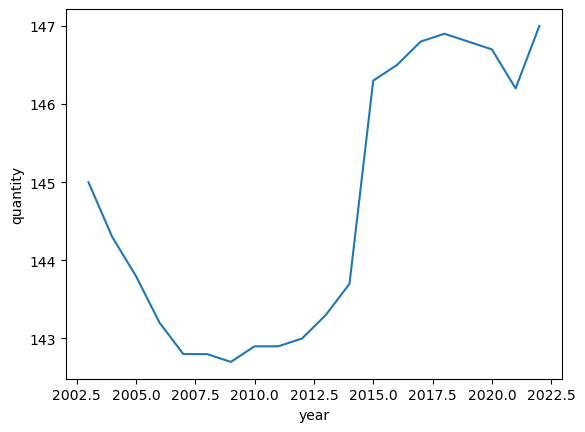

In [19]:
sns.lineplot(data=df_merge, x="year", y="quantity")

### Можем наблюдать спад численности населения в период с 2003-2013 и рост в период с 2014-2017 года

<Axes: >

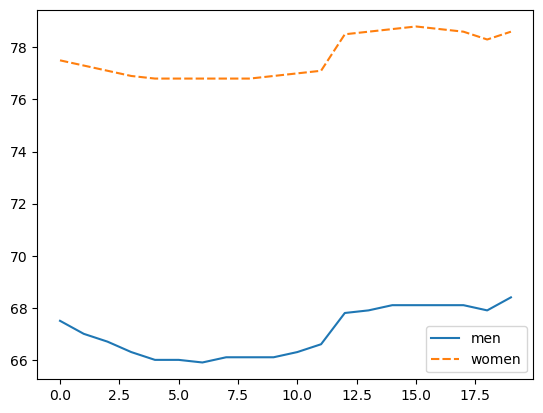

In [24]:
sns.lineplot(data=df_merge[['men', 'women']])

### Численность женщин за все время превышала численност мужчин

<Axes: >

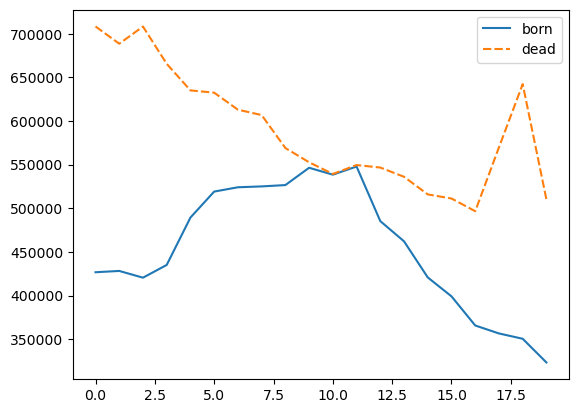

In [120]:
sns.lineplot(data=df_merge[['born', 'dead']])

### В 2012-2014 можем наблюдать почти что равное количество родившихся и умерших людей. Тем не менее смертность за все времен превышала рождаемость, и, начиная с 2015 года рождаемость только падала

### Посмотрим на естественный прирост населения, для этого вычтем из количества рожденных количество умерших людей

In [26]:
df_merge['natural_growth'] = df_merge['born'] - df_merge['dead']
df_merge.head()

,year,quantity,men,women,born,dead,natural_growth
0,2003,145.0,67.5,77.5,426736,708257,-281521
1,2004,144.3,67.0,77.3,428230,688508,-260278
2,2005,143.8,66.7,77.1,420506,708173,-287667
3,2006,143.2,66.3,76.9,435097,665458,-230361
4,2007,142.8,66.0,76.8,489381,635034,-145653


<Axes: xlabel='year', ylabel='natural_growth'>

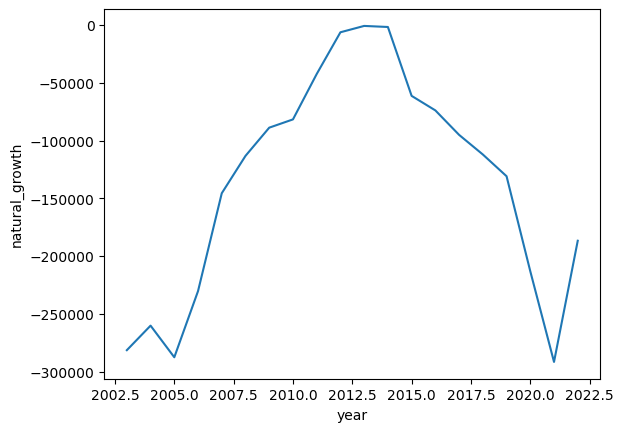

In [27]:
sns.lineplot(data=df_merge, x='year', y='natural_growth')

### Наблюдаем отрицательные значения на всем промежутке. Естественный прирост стремился к положительной отметки до 2014, однако после 2014 года все больше уменьшался 

### Посомтрим на корреляцию данных. Возможно, заметим какие-нибудь удивительные тенденции

<Axes: >

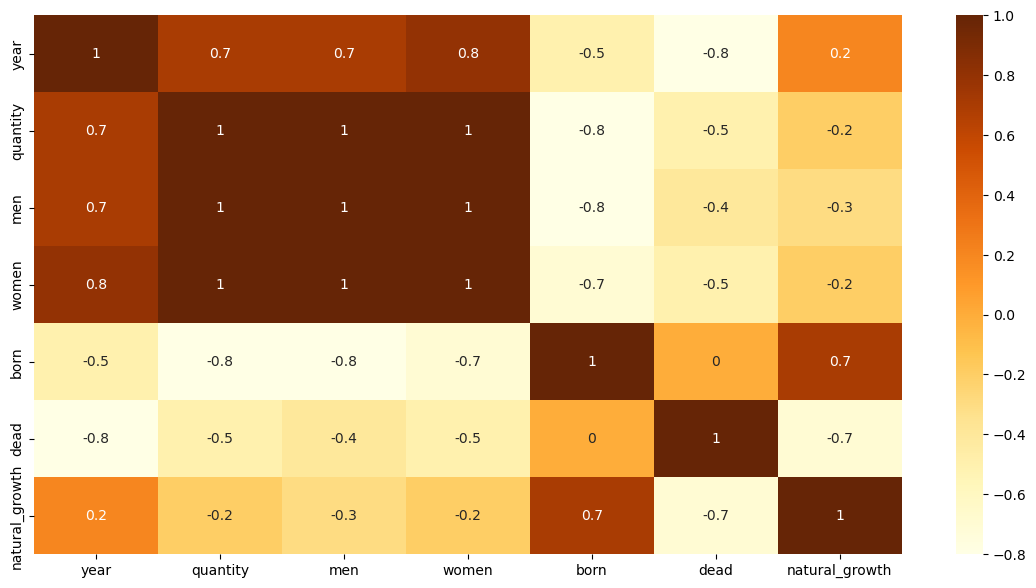

In [30]:
correlation = df_merge.corr().round(1)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

### К сожалению, ничего необычного здесь нет

### Стало интересно сколько на 1000 мужчин приходится женщин. Чтобы далеко не ходить, возьмем их среднее 

In [130]:
men_mean = np.mean(df_merge['men'])
women_mean = np.mean(df_merge['women'])

result = round(women_mean / men_mean * 1000)
result

1158

### В среднем за все года на 1000 мужчин приходилось 1158 женщин

# Заключение

## Анализировались численность населения, в том числе по полам, рождаемость и смертность за последнии 20 лет. К сожалению, данных достаточно мало, чтобы спрогнозировать моделями машинного обучения. Итак, мы имеем:
## 1. Спад численности населения в период с 2003-2013 и рост в период с 2014-2017 года
## 2. Численность насления в среднем равнялась 144.68 млн 
## 3. Численность женщин за все анализируемое время превышала численность мужчин
## 4. Смертность за все временя превышала рождаемость, и, начиная с 2015 года рождаемость только падала
## 5. Естественный прирост населения за последние 20 лет был только отрицательным (в 2014 почти что равнялся 0) и становится все меньше с каждым годом
## 6. В среднем за все анализируемые года на 1000 мужчин приходилось 1158 женщин

## Таким образом, можно сделать вывод, что в настоящее время мы наблюдаем отрицательную демографическую динамику